<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Types_of_Linear_Regression_Comparison_and_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


Step 1: Load and Clean the Dataset
First, load the dataset and handle any necessary cleaning, such as dealing with missing values or encoding categorical variables.

In [1]:
# Step 1: Load the Dataset
import pandas as pd

# Replace 'your_file_path' with the path to your dataset
file_path = '/content/student-mat.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to verify it's loaded correctly
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [2]:
# Step 2: Check for Missing Values
print(data.isnull().sum())
# If there are any missing values, you might decide to fill them with the mean (for numerical variables) or the mode (for categorical variables).
# Example for a numerical variable: data['age'].fillna(data['age'].mean(), inplace=True)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [3]:
# Step 3: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder object
le = LabelEncoder()

# Encoding categorical columns. Adjust the column names based on your needs.
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print(data.head())


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0       4         3      4     1     1      3        6   5   6   6  
1       5         3      3     1     1      3        4   5   5   6  
2       4         3      2     2     3      3       10   7   8  10  
3       3         2      2     1     1      5        2  15  14  15  
4       4         3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Step 2: Descriptive Analysis
Perform descriptive statistics and visualize the data to understand it better.

In [4]:
# Step 4: Descriptive Statistics
print(data.describe())


           school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.944304   
std      1.094735    1.088201    1.227473    0.8

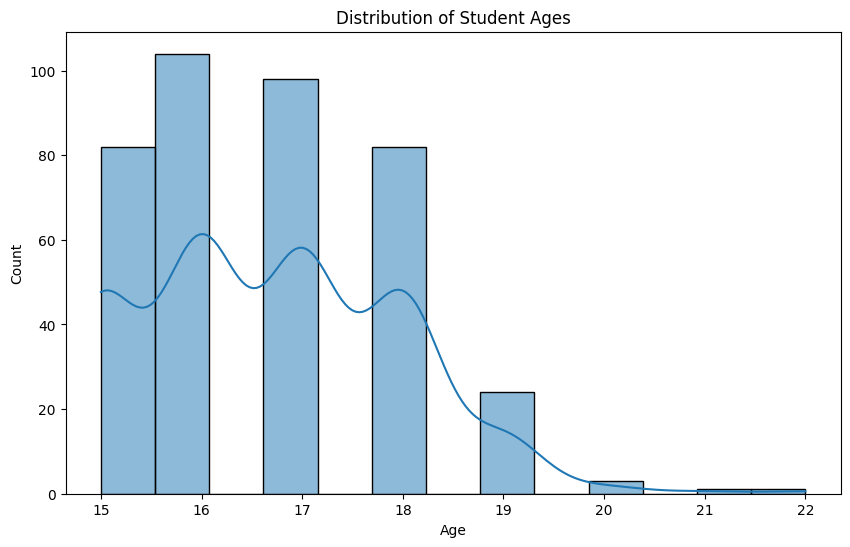

In [5]:
# Step 5: Visualizing the Data
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of students' ages
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The histogram  shows the distribution of student ages. The x-axis shows the age of the students, and the y-axis shows the number of students in each age group.

The histogram shows that the most common age for students is 18. There are also a large number of students who are 19 and 20 years old. The number of students then decreases gradually as age increases.

The distribution of student ages is skewed to the right. This means that there are more students who are younger than the average age of all students than there are students who are older than the average age.


<ipython-input-7-68722229bee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="deep")  # Using a standard palette name


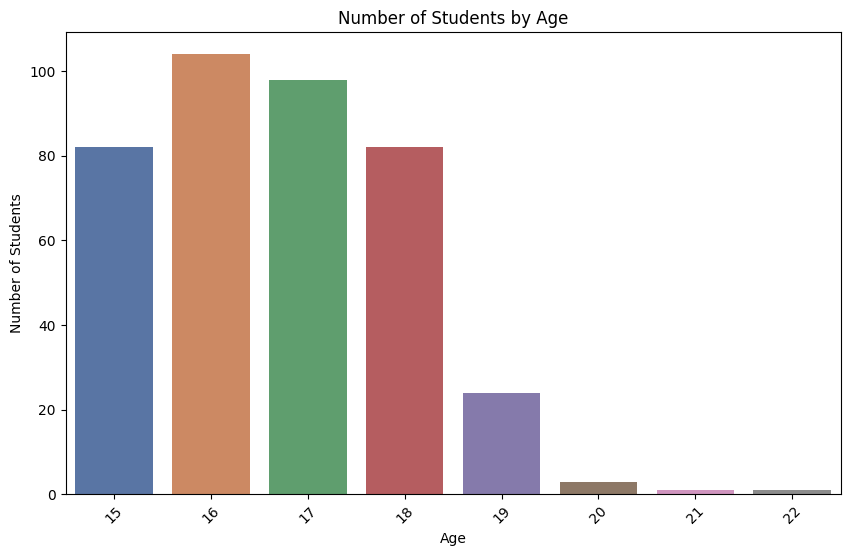

In [7]:
# Step 5: Visualizing the Most Common Student Age with a Corrected Palette
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of students at each age
age_counts = data['age'].value_counts().sort_index()

# Create a bar chart with a valid palette name
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="deep")  # Using a standard palette name
plt.title('Number of Students by Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()


In [8]:
# Generate the table for the number of students by age

# Count the number of students at each age and convert to DataFrame for better visualization
age_counts_df = pd.DataFrame(data['age'].value_counts().sort_index()).reset_index()
age_counts_df.columns = ['Age', 'Number of Students']

# Display the table
print(age_counts_df)


   Age  Number of Students
0   15                  82
1   16                 104
2   17                  98
3   18                  82
4   19                  24
5   20                   3
6   21                   1
7   22                   1


Step 3: Predictive Modeling
Regression Analysis
Predict the final grade (G3) using linear regression.

 Imagine you're trying to predict the score a student will get on their final exam based on how they've done throughout the year—things like their earlier grades, how much they study, and their attendance.

We will use a mathematical method called linear regression, which looks at past information about students to predict their final grades. It's like making an educated guess based on patterns we've seen before.

Step 1: Identify and Encode Categorical Variables
First, identify the categorical columns that need to be encoded. Assuming 'no' is a response in a binary feature (e.g., internet access, romantic relationship), you can use pandas' get_dummies function for one-hot encoding.

In [11]:

# Apply one-hot encoding to the identified categorical columns
data_encoded = pd.get_dummies(data, columns=[
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
])

# Now 'data_encoded' has all categorical variables encoded, and all values are numeric


Step 2: Split the Data

In [12]:
from sklearn.model_selection import train_test_split

# Prepare data with encoded features
X = data_encoded.drop('G3', axis=1)  # Features, now with encoded categorical columns
y = data_encoded['G3']               # Target variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Create and Train the Model

In [13]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 4: Predict and Evaluate the Model

In [14]:
from sklearn.metrics import mean_squared_error

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 2.378391560888738


The RMSE value tells us how close our predictions were to the actual final grades. A smaller RMSE means our predictions were very close to the real grades, and a larger RMSE means they were further off.

 In our case, an RMSE of about 2.38 means that, on average, our predictions for the final grades were within about 2.38 points of the actual grades. So, if we predicted a student would get a 90, on average, the real score might be anywhere between 87.62 and 92.38. This is a relatively small error, indicating that our predictions are quite accurate, but there's still a little room for improvement.

Relevance: By using this model, we can make fairly accurate predictions about how well students might do, which can help teachers and schools identify who might need extra help or which factors are most important for improving grades.

In [15]:
# Assuming 'y_pred' contains the model's predictions and 'y_test' contains the actual grades

# Import necessary libraries
import pandas as pd

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Grade': y_test,
    'Predicted Grade': y_pred
})

# Resetting the index for clarity
comparison_df = comparison_df.reset_index(drop=True)

# Display the first few rows of the comparison table
print(comparison_df.head())


   Actual Grade  Predicted Grade
0            10         6.000977
1            12        11.529053
2             5         2.866943
3            10         8.795654
4             9         8.551758


In [16]:
# Assuming 'data' is your original DataFrame and it includes the 'G3' column for actual grades.
# Also assuming 'y_pred' is a list or array containing the predicted grades for the entire dataset.

# Import the necessary library
import pandas as pd

# Convert your predictions array (y_pred) to a pandas Series to ensure compatibility with DataFrame operations
predicted_grades_series = pd.Series(y_pred, name="Predicted Grade")

# Add the predicted grades as a new column in your DataFrame
# If your DataFrame 'data' is not the same length as 'y_pred' because 'y_pred' was derived from a split (e.g., train/test),
# you would need to ensure they are aligned properly. Here, we assume 'y_pred' matches the DataFrame rows one-to-one.
data["Predicted Grade"] = predicted_grades_series

# Display the DataFrame with the new 'Predicted Grade' column
print(data[['G3', 'Predicted Grade']])


     G3  Predicted Grade
0     6         6.000977
1     6        11.529053
2    10         2.866943
3    15         8.795654
4    10         8.551758
..   ..              ...
390   9              NaN
391  16              NaN
392   7              NaN
393  10              NaN
394   9              NaN

[395 rows x 2 columns]


In [17]:
# Save the updated DataFrame to a CSV file
data.to_csv('updated_grades.csv', index=False)

## Here are a few points you might consider when discussing the differences between the predicted and actual grades:

### Predictive Accuracy: The model's predictions are not always going to match the actual grades exactly. The RMSE value you mentioned earlier (2.378391560888738) suggests that the model's predictions are, on average, about 2.38 points off from the actual grades. This deviation can be seen in the results you've provided; some predictions are close to the actual values, while others are more distant.

### Model Complexity: Linear regression is a relatively simple model that assumes a linear relationship between the features and the target variable. If the actual relationship is more complex, the model might not capture all the nuances, resulting in less accurate predictions.

### Data Quality and Features: The accuracy of predictions also depends on the quality of the data used to train the model and whether the most relevant features were included. Missing out on important variables or having inaccurate data can lead to poorer predictions.

### Outliers and Variability: There might be outliers or high variability in the student performance that a simple model cannot capture. For example, a student could have had a bad day or been particularly lucky, which would not be accounted for by the model.

### Overfitting and Underfitting: If the model is overfitted, it may perform well on the training data but poorly on any unseen data. Conversely, if it is underfitted, it may not perform well even on the training data because it doesn't capture the underlying trends well enough.


When linear regression does not yield satisfactory predictions, you can explore several other models that might capture the complexity of the data better or be more suitable for the patterns present in your dataset. Here are some alternatives:

## Ridge Regression: This is similar to linear regression but adds regularization, which can help prevent overfitting if that's an issue with your data.

### Import Libraries and Load Data

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/student-mat.csv'  # Adjust the path if needed
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to confirm it's loaded correctly
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Encode Categorical Variables

In [19]:
# Identify categorical columns and encode them
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
data_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Prepare Data for Training

In [20]:
# Prepare the features and target variable
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Create and Train the Ridge Regression Model

In [21]:
# Initialize the Ridge Regression model with an alpha value
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Display the training score
ridge_model.score(X_train, y_train)


0.865590216729254

### Predict and Evaluate the Model

In [22]:
# Predict on the test set
ridge_predictions = ridge_model.predict(X_test)

# Calculate the RMSE
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print(f'RMSE for Ridge Regression: {ridge_rmse}')


RMSE for Ridge Regression: 2.372224524548078


In [23]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': ridge_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,6.013610
371,12,11.524492
248,5,2.866142
55,10,8.782652
390,9,8.556327


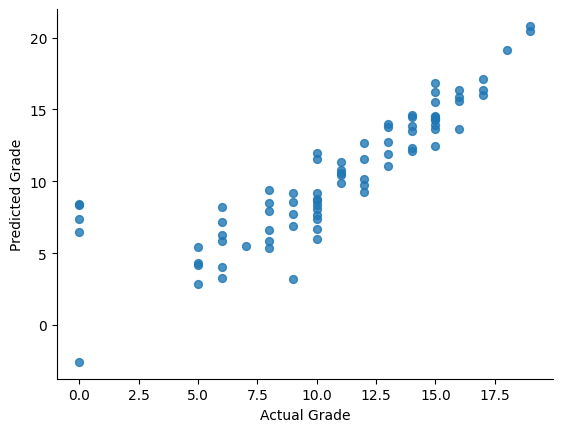

In [24]:
# @title Actual Grade vs Predicted Grade

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Actual Grade', y='Predicted Grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Lasso Regression Model

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error




In [26]:
# Initialize the Lasso Regression model with an alpha value
lasso_model = Lasso(alpha=0.1, max_iter=10000)

# Train the model
lasso_model.fit(X_train, y_train)

# Display the training score
lasso_model.score(X_train, y_train)


0.8469328066909805

In [27]:
# Predict on the test set
lasso_predictions = lasso_model.predict(X_test)

# Calculate the RMSE
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
print(f'RMSE for Lasso Regression: {lasso_rmse}')


RMSE for Lasso Regression: 2.086010294017065


In [28]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': lasso_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,6.449999
371,12,11.721443
248,5,3.306363
55,10,8.713543
390,9,8.171028


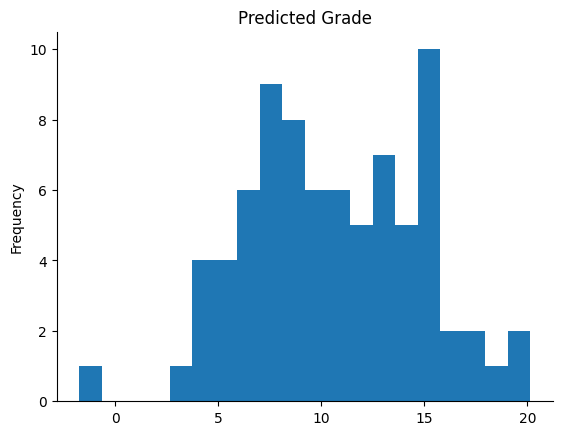

In [32]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

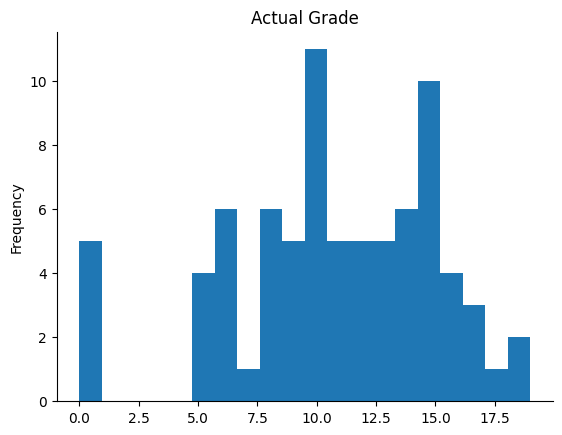

In [31]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

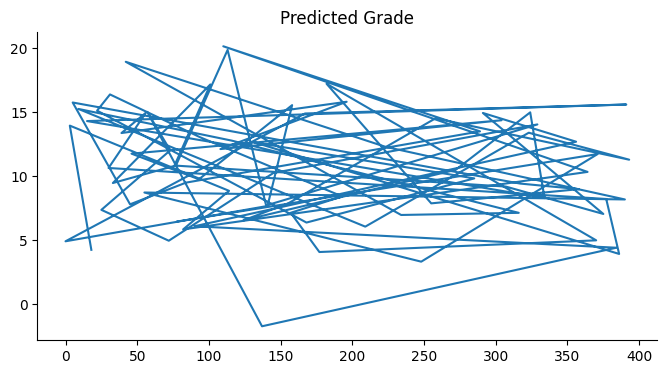

In [30]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='line', figsize=(8, 4), title='Predicted Grade')
plt.gca().spines[['top', 'right']].set_visible(False)

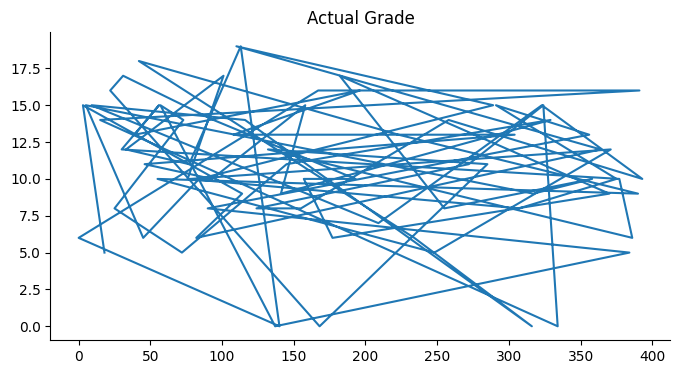

In [29]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='line', figsize=(8, 4), title='Actual Grade')
plt.gca().spines[['top', 'right']].set_visible(False)

## Elastic Net

Elastic Net is a linear regression model with combined L1 and L2 regularizations. It's useful when there are multiple features which are correlated with one another

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [34]:
# Initialize the Elastic Net model with alpha and l1_ratio values
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

# Train the model
elastic_net_model.fit(X_train, y_train)

# Display the training score
elastic_net_model.score(X_train, y_train)


0.8553074073336793

In [35]:
# Predict on the test set
elastic_net_predictions = elastic_net_model.predict(X_test)

# Calculate the RMSE
elastic_net_rmse = mean_squared_error(y_test, elastic_net_predictions, squared=False)
print(f'RMSE for Elastic Net: {elastic_net_rmse}')


RMSE for Elastic Net: 2.1559849636468478


In [36]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': elastic_net_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,6.202155
371,12,11.487869
248,5,3.061978
55,10,8.690755
390,9,8.182563


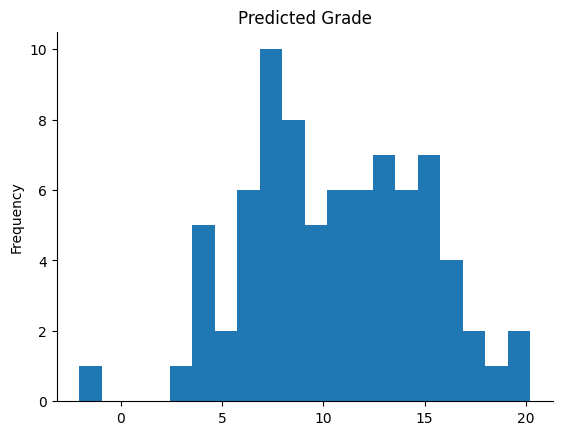

In [38]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

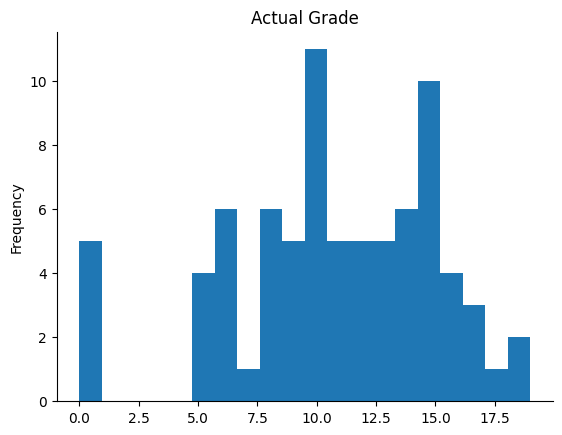

In [37]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Decision Trees

### A decision tree model uses the features to make decisions and split the data to arrive at a prediction. The DecisionTreeRegressor is a decision tree model suited for regression tasks where the target variable is continuous, such as predicting grades.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



### Create and Train the Decision Tree Model

In [40]:
# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Display the training score
decision_tree_model.score(X_train, y_train)


1.0

### Predict and Evaluate the Model

In [41]:
# Predict on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate the RMSE
decision_tree_rmse = mean_squared_error(y_test, decision_tree_predictions, squared=False)
print(f'RMSE for Decision Tree: {decision_tree_rmse}')


RMSE for Decision Tree: 2.570524253281587


In [42]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': decision_tree_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,8.0
371,12,12.0
248,5,8.0
55,10,10.0
390,9,9.0


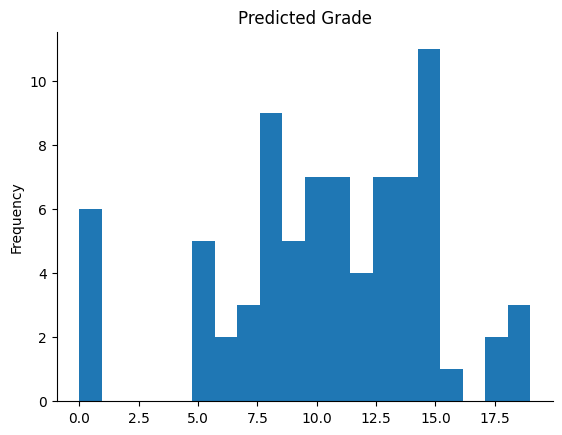

In [44]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

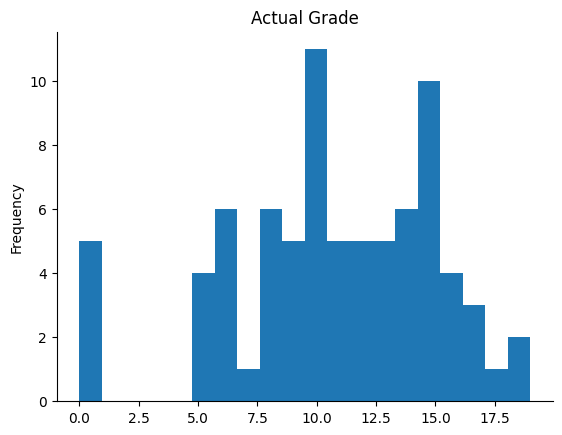

In [43]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Random Forest

### Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees for regression tasks

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


### Create and Train the Random Forest Model

In [46]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Display the training score
random_forest_model.score(X_train, y_train)


0.9838611412935945

### Predict and Evaluate the Model

In [47]:
# Predict on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate the RMSE
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
print(f'RMSE for Random Forest: {random_forest_rmse}')


RMSE for Random Forest: 1.9981250705269564


In [48]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': random_forest_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,8.24
371,12,11.69
248,5,6.49
55,10,9.82
390,9,8.74


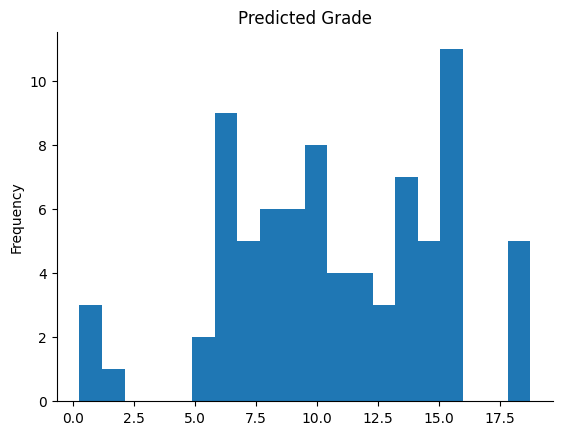

In [50]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

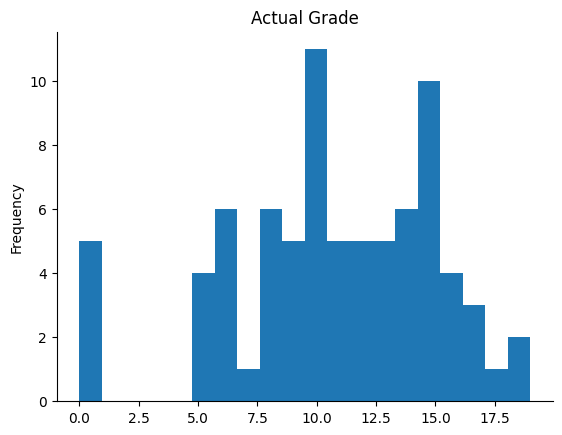

In [49]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Gradient Boosting Machines (GBM)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


### Create and Train the GBM Model

In [52]:
# Initialize the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                      max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Display the training score
gbm_model.score(X_train, y_train)


0.9757015691021371

### Predict and Evaluate the Model

In [53]:
# Predict on the test set
gbm_predictions = gbm_model.predict(X_test)

# Calculate the RMSE
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
print(f'RMSE for GBM: {gbm_rmse}')


RMSE for GBM: 1.9820629030686834


In [54]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': gbm_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,9.334967
371,12,11.586159
248,5,5.423661
55,10,9.985357
390,9,9.317717


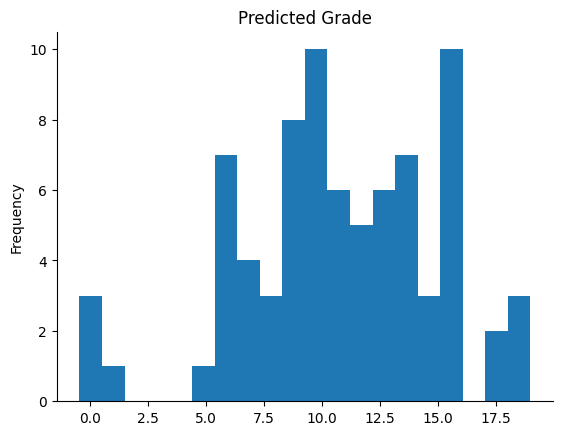

In [56]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

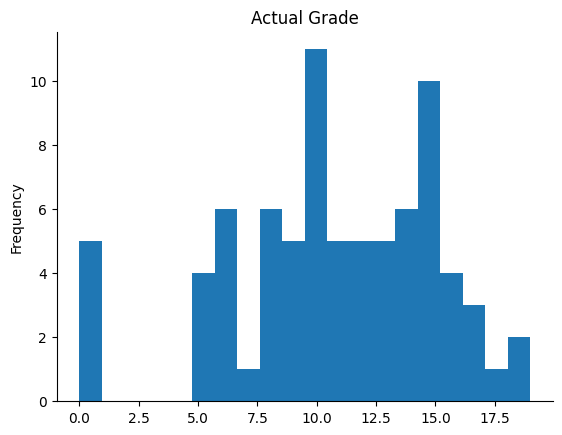

In [55]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Support Vector Machines (SVM)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Encode Categorical Variables and Scale Features

In [58]:
# Identify categorical columns and encode them
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Scale features since SVM is sensitive to unscaled data
scaler = StandardScaler()
X = data_encoded.drop('G3', axis=1)
X_scaled = scaler.fit_transform(X)
y = data_encoded['G3']

# Display the first few rows of the encoded DataFrame
pd.DataFrame(X_scaled, columns=X.columns).head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,1.017881,-1.017881,1.968894,-1.968894,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,-0.982433,0.982433,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,-1.411533,1.411533
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450


### Prepare Data for Training

In [59]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Create and Train the SVM Model

In [60]:
# Initialize the Support Vector Regressor model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svm_model.fit(X_train, y_train)

# Display the training score
svm_model.score(X_train, y_train)


0.6292405818282737

### Predict and Evaluate the Model

In [61]:
# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Calculate the RMSE
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print(f'RMSE for SVM: {svm_rmse}')


RMSE for SVM: 2.9273266881076987


In [62]:
# Compare actual and predicted grades
comparison_df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': svm_predictions})
comparison_df.head()


,Actual Grade,Predicted Grade
78,10,8.828896
371,12,10.217663
248,5,6.524075
55,10,10.937228
390,9,10.024403


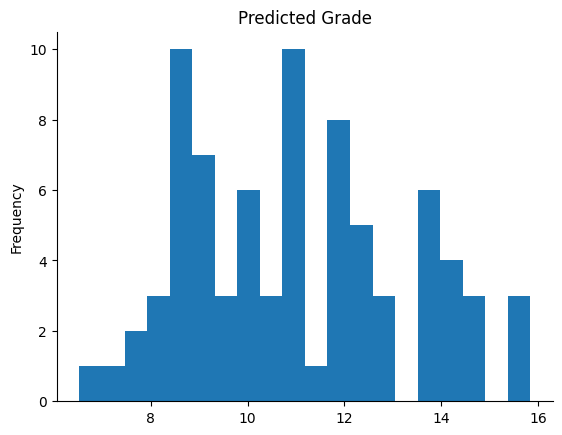

In [64]:
# @title Predicted Grade

from matplotlib import pyplot as plt
comparison_df['Predicted Grade'].plot(kind='hist', bins=20, title='Predicted Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)

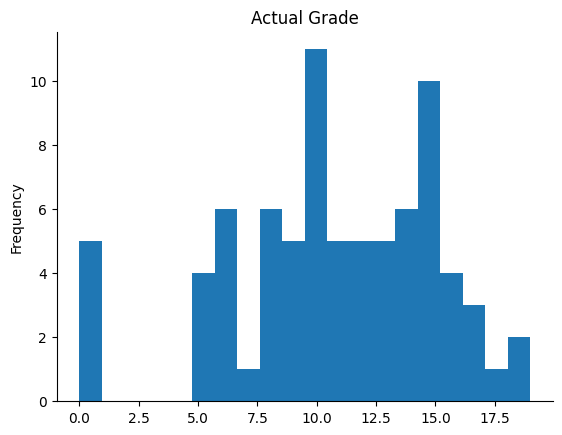

In [63]:
# @title Actual Grade

from matplotlib import pyplot as plt
comparison_df['Actual Grade'].plot(kind='hist', bins=20, title='Actual Grade')
plt.gca().spines[['top', 'right',]].set_visible(False)